In [1]:
import pandas as pd
import numpy as np

In [2]:
crop = pd.read_csv("Crop_recommendation.csv")
fertility = pd.read_csv("soil_health.csv")

In [6]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
print(crop.shape)
print(fertility.shape)

(2200, 8)
(880, 13)


In [ ]:
crop.info()
fertility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       880 non-null    int64  
 1   P       880 non-null    float64
 2   K       880 non-null    int64  
 3   pH      880 non-null    float64
 4   EC      880 non-null    float64
 5   OC      880 non-null    float64
 6   S   

In [ ]:
crop.isnull().sum()
fertility.isnull().sum()

,0
N,0
P,0
K,0
pH,0
EC,0
OC,0
S,0
Zn,0
Fe,0
Cu,0


In [ ]:
crop.duplicated().sum()

0

In [ ]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
# crop.corr()

<Axes: >

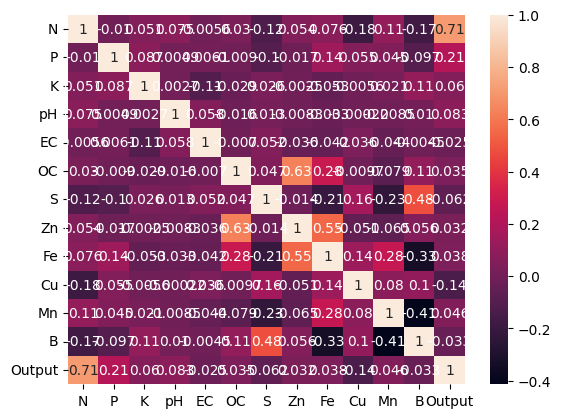

In [ ]:
import seaborn as sns
# sns.heatmap(crop.corr(), annot=True, cbar=True)
sns.heatmap(fertility.corr(), annot=True, cbar=True)

In [ ]:
crop.label.value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
crop['label'].unique().size

22

d:\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


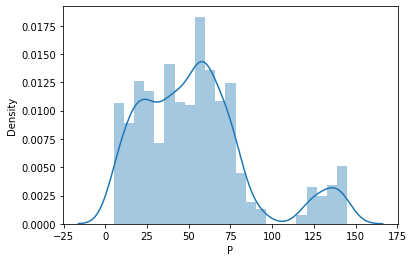

In [ ]:
import matplotlib.pyplot as plt
sns.distplot(crop['P'])
plt.show()

d:\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


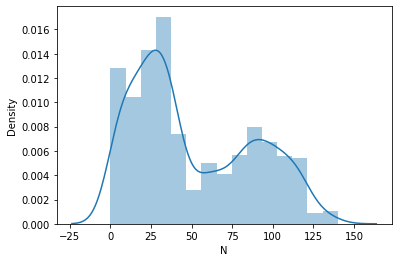

In [ ]:
import matplotlib.pyplot as plt
sns.distplot(crop['N'])
plt.show()

In [ ]:
crop.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [3]:
crop_dict={
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}

crop['label'] = crop['label'].map(crop_dict)


In [ ]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [ ]:
crop.label.unique()

array([ 1,  2, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,
        6,  5,  4,  3, 22], dtype=int64)

In [ ]:
crop.label.value_counts()

1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: label, dtype: int64

In [4]:
X=crop.drop('label', axis = 1)
y=crop['label']

In [5]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

For fertility

In [6]:
X_fert=fertility[['N', 'P', 'K', 'pH', 'EC']]
y_fert=fertility['Output']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_fert_train, X_fert_test, y_fert_train, y_fert_test = train_test_split(X_fert, y_fert, test_size = 0.2, random_state=42)

In [20]:
print(X_train.shape)
print(X_fert_train.shape)

(1760, 7)
(704, 5)


In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [30]:
mx_crop = MinMaxScaler()
X_train_scaled = mx_crop.fit_transform(X_train)
X_test_scaled = mx_crop.transform(X_test)

In [31]:
mx_fert = MinMaxScaler()
X_fert_train_scaled = mx_fert.fit_transform(X_fert_train)
X_fert_test_scaled = mx_fert.transform(X_fert_test)

In [ ]:
print(X_train)
print(X_fert_train)

In [35]:
sc_crop = StandardScaler()
X_train = sc_crop.fit_transform(X_train)
X_test=sc_crop.transform(X_test)

In [36]:
sc_fert = StandardScaler()
X_fert_train = sc_fert.fit_transform(X_fert_train)
X_fert_test = sc_fert.transform(X_fert_test)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [11]:
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB':GaussianNB(),
    'SVC':SVC(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'ExtraTreeClassifier':ExtraTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'BaggingClassifier':BaggingClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier()
}

In [37]:
# Accuracy check for crop prediction models
print("Accuracy check for Crop Prediction\n")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Use scaled X_train
    y_pred = model.predict(X_test_scaled)  # Use scaled X_test
    score = accuracy_score(y_test, y_pred)
    print(f"{name} model with accuracy: {score}")

# Accuracy check for soil fertility prediction models
print("\nAccuracy check for Soil Fertility\n")
for name, model in models.items():
    model.fit(X_fert_train_scaled, y_fert_train)  # Use scaled X_fert_train
    y_fert_pred = model.predict(X_fert_test_scaled)  # Use scaled X_fert_test
    score = accuracy_score(y_fert_test, y_fert_pred)
    print(f"{name} model with accuracy: {score}")


Accuracy check for Crop Prediction

LogisticRegression model with accuracy: 0.9204545454545454
GaussianNB model with accuracy: 0.9954545454545455
SVC model with accuracy: 0.9681818181818181
KNeighborsClassifier model with accuracy: 0.9704545454545455
DecisionTreeClassifier model with accuracy: 0.9840909090909091
ExtraTreeClassifier model with accuracy: 0.9159090909090909
RandomForestClassifier model with accuracy: 0.9954545454545455
BaggingClassifier model with accuracy: 0.9886363636363636
GradientBoostingClassifier model with accuracy: 0.9818181818181818
AdaBoostClassifier model with accuracy: 0.1409090909090909

Accuracy check for Soil Fertility

LogisticRegression model with accuracy: 0.8465909090909091
GaussianNB model with accuracy: 0.7670454545454546
SVC model with accuracy: 0.8465909090909091
KNeighborsClassifier model with accuracy: 0.8352272727272727
DecisionTreeClassifier model with accuracy: 0.8579545454545454
ExtraTreeClassifier model with accuracy: 0.7670454545454546
Rando

In [38]:
randclf_crop = RandomForestClassifier()
randclf_crop.fit(X_train_scaled, y_train)
y_pred = randclf_crop.predict(X_test_scaled)
print(f"Accuracy of R.Classifier for crop_recoomendation = {accuracy_score(y_test, y_pred)}")

# Classifier for Fertility

randclf_fert = RandomForestClassifier()
randclf_fert.fit(X_fert_train_scaled, y_fert_train)
y_fert_pred = randclf_fert.predict(X_fert_test_scaled)
print(f"Accuracy of R.Classifier for health_recoomendation = {accuracy_score(y_fert_test, y_fert_pred)}")

Accuracy of R.Classifier for crop_recoomendation = 0.9931818181818182
Accuracy of R.Classifier for health_recoomendation = 0.9034090909090909


In [ ]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [24]:
fertility.columns

Index(['N', 'P', 'K', 'pH', 'EC', 'OC', 'S', 'Zn', 'Fe', 'Cu', 'Mn', 'B',
       'Output'],
      dtype='object')

In [40]:
def crop_recommendation(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    mx_features = mx_crop.transform(features)
    sc_mx_features = sc_crop.transform(mx_features)
    prediction = randclf_crop.predict(sc_mx_features).reshape(1,-1)
    return prediction[0]

def fertility_prediction(N,P,K,pH,EC):
    features = np.array([[N,P,K,pH,EC]])
    mx_features = mx_fert.transform(features)
    sc_mx_features = sc_fert.transform(mx_features)
    prediction = randclf_fert.predict(sc_mx_features).reshape(1,-1)
    return prediction[0]

In [ ]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [41]:
N=90
P= 42
K= 43
temperature= 20.87
humidity=82.00
ph=6.502985
rainfall=202.93

predict = crop_recommendation(N,P,K,temperature,humidity,ph,rainfall)

In [42]:
predict

array([8], dtype=int64)

In [43]:
N=90
P= 42
K= 43
pH= 6.502985
EC= 202.935536

predict = fertility_prediction(N,P,K,pH,EC)
print(predict)

[2]


In [45]:
import pickle
import os
files = ['model_crop.pkl', 'minmaxscaler_crop.pkl', 'standscaler_crop.pkl',
         'model_fert.pkl', 'minmaxscaler_fert.pkl', 'standscaler_fert.pkl']

for file in files:
    if os.path.exists(file):
        os.remove(file)
        
pickle.dump(randclf_crop, open('model_crop.pkl', 'wb'))
pickle.dump(mx_crop, open('minmaxscaler_crop.pkl', 'wb'))
pickle.dump(sc_crop, open('standscaler_crop.pkl', 'wb'))

pickle.dump(randclf_fert, open('model_fert.pkl', 'wb'))
pickle.dump(mx_fert, open('minmaxscaler_fert.pkl', 'wb'))
pickle.dump(sc_fert, open('standscaler_fert.pkl', 'wb'))